In [9]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn import preprocessing

import kilroy_was_here
from audace.jupytools import iprint, mooltipath


EXP_NAME = "99.01 - Exploring MFCC"

FILE_PATH_H1_Q  = str(mooltipath('datasets/MAIN1000/samples', '21-000020.wav'))
FILE_PATH_H1_NQ = str(mooltipath('datasets/MAIN1000/samples', '27-000020.wav'))
FILE_PATH_H3_Q  = str(mooltipath('datasets/MAIN1000/samples', '46-000020.wav'))
FILE_PATH_H3_NQ = str(mooltipath('datasets/MAIN1000/samples', '31-000020.wav'))

c_emph = 0.97
n_mfcc = 20

# default 40
n_mels = 40

# default 2048
n_fft = 2048

#default 512
hop_length = 512

# default 0
fmin = 0

# default None
fmax = None

sr = 22050




s_h1_q , sr = librosa.core.load(FILE_PATH_H1_Q, sr=sr)
s_h1_nq , sr = librosa.core.load(FILE_PATH_H1_NQ, sr=sr)
s_h3_q , sr = librosa.core.load(FILE_PATH_H3_Q, sr=sr)
s_h3_nq , sr = librosa.core.load(FILE_PATH_H3_NQ, sr=sr)


mfcc = librosa.feature.mfcc(y=s_h1_q, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc, n_mels = n_mels, fmin=fmin, fmax = fmax)
print(len(s_h1_q))
print(mfcc.shape)
print(mfcc)


22050
(20, 44)
[[-2.18171356e+02 -2.13791321e+02 -2.12083496e+02 -2.12672089e+02
  -1.97884399e+02 -2.03747482e+02 -2.15001755e+02 -2.11353363e+02
  -2.13501495e+02 -2.08149506e+02 -2.09512268e+02 -2.11830566e+02
  -2.13086761e+02 -2.06139877e+02 -2.04276962e+02 -2.05708755e+02
  -2.03917130e+02 -2.07770050e+02 -2.14345749e+02 -2.12636353e+02
  -2.14542236e+02 -2.16269135e+02 -2.15221832e+02 -2.11377487e+02
  -2.11509323e+02 -2.12019623e+02 -2.15661896e+02 -2.17254730e+02
  -2.13428879e+02 -2.13954803e+02 -2.14105988e+02 -2.10941223e+02
  -2.10486740e+02 -2.13049606e+02 -2.13675354e+02 -2.01480408e+02
  -1.95990997e+02 -2.07989670e+02 -2.07947006e+02 -2.10251160e+02
  -2.10412521e+02 -2.13389389e+02 -2.14817688e+02 -2.18518326e+02]
 [ 7.24698029e+01  6.80077820e+01  6.72863007e+01  7.23571472e+01
   6.22002106e+01  6.22122726e+01  7.54038467e+01  7.36630707e+01
   7.22519455e+01  7.47552109e+01  7.43791580e+01  7.17935638e+01
   7.08717804e+01  7.29634857e+01  7.28713989e+01  7.3873245

In [10]:
def emph(s, coeff):
        return np.append(s[0], s[1:] - coeff * s[:-1])

def stft(sig):
    return np.abs(librosa.stft(sig,
                               n_fft=2048,
                               hop_length=2048,
                               win_length=2048,
                               window='hann',
                               center=True,
                               dtype=np.complex64,
                               pad_mode='reflect'
                               )
                  )

def MFCC(sig):
    return librosa.feature.mfcc(
        y=sig,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mfcc=n_mfcc,
        n_mels = n_mels,
        fmin=fmin,
        fmax = fmax)


def MFCC2(sig):
    melspec = librosa.feature.melspectrogram(sig, sr)
    return librosa.feature.mfcc(
        S=librosa.power_to_db(melspec),
        sr=sr,
        n_mfcc= n_mfcc
    )    

#librosa.display.specshow(mfccs[1:,], y_axis='log', x_axis='s', sr=sr)
def specshow(s, x_axis='s', y_axis='log'):
    librosa.display.specshow(s, x_axis=x_axis, y_axis=y_axis, sr=sr)
        #sr=sr,
        #n_fft=n_fft,
        #hop_length=hop_length,
        #n_mfcc=n_mfcc,
        #n_mels = n_mels,
        #fmin=fmin                             
    #)

signals = [
    [s_h1_q, s_h1_nq],
    [s_h3_q, s_h3_nq]
]

signals_std = [
    [preprocessing.scale(s_h1_q), preprocessing.scale(s_h1_nq)],
    [preprocessing.scale(s_h3_q), preprocessing.scale(s_h3_nq)]
]

signals_emph = [
    [emph(s_h1_q, c_emph), emph(s_h1_nq, c_emph)],
    [emph(s_h3_q, c_emph), emph(s_h3_nq, c_emph)]
]

signals_emph_std = [
    [preprocessing.scale(emph(s_h1_q, c_emph)), preprocessing.scale(emph(s_h1_nq, c_emph))],
    [preprocessing.scale(emph(s_h3_q, c_emph)), preprocessing.scale(emph(s_h3_nq, c_emph))]
]

titles = [['Hive1 Q', 'Hive1 NQ'], ['Hive3 Q', 'Hive3 NQ']]

lsignals = [signals, signals_std, signals_emph, signals_emph_std] 
ltitles = ['raw', 'std', 'emphasised', 'emphasised std'] 


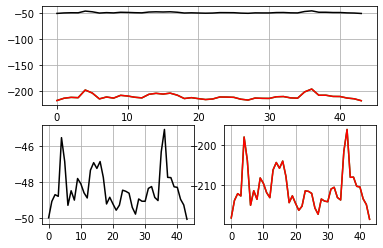

In [11]:
melkwargs={"n_fft" : n_fft, "n_mels" : n_mels, "hop_length":hop_length, "f_min" : fmin, "f_max" : fmax}

y = lsignals[0][0][0]

# Default librosa with db mel scale 
mfcc_lib_db = librosa.feature.mfcc(y=y, sr=sr, n_fft=n_fft,
                                    n_mfcc=n_mfcc, n_mels=n_mels,
                                    hop_length=hop_length,
                                    fmin=fmin, fmax=fmax, htk=False)

# Modified librosa with log mel scale (helper)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmin=fmin, 
                                    fmax=fmax, hop_length=hop_length)

# Nearly identical to above
mfcc_lib_db2 = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc, htk=False)

# Modified librosa with log mel scale
mfcc_lib_log = librosa.feature.mfcc(S=np.log(S+1e-6), n_mfcc=n_mfcc, htk=False)

feature = 0 # <-------- Play with this!!
plt.subplot(2, 1, 1)

plt.plot(mfcc_lib_log.T[:,feature], 'k')
plt.plot(mfcc_lib_db.T[:,feature], 'g')
plt.plot(mfcc_lib_db2.T[:,feature], 'r')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(mfcc_lib_log.T[:,feature], 'k')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(mfcc_lib_db.T[:,feature], 'g')
plt.plot(mfcc_lib_db2.T[:,feature], 'r')
plt.grid()

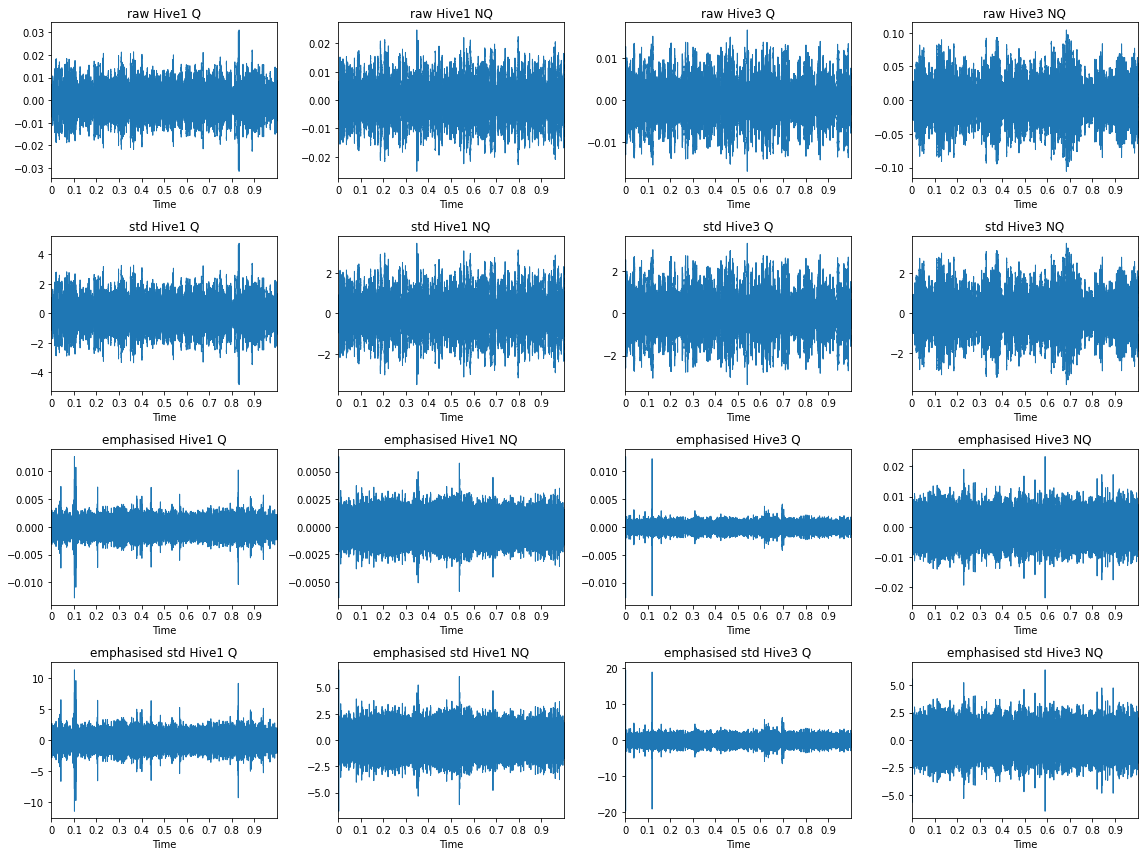

In [12]:
plt.figure(figsize=(16, 12))

for i, signal in enumerate(lsignals):
    for hive in range(2):
        for label in range(2):
            sig = signal[hive][label]
            plt.subplot(len(lsignals), 4, 1 + i*len(lsignals) + 2*hive + label)
            librosa.display.waveplot(sig, sr = sr)
            plt.title(ltitles[i] + " " + titles[hive][label])
plt.tight_layout()

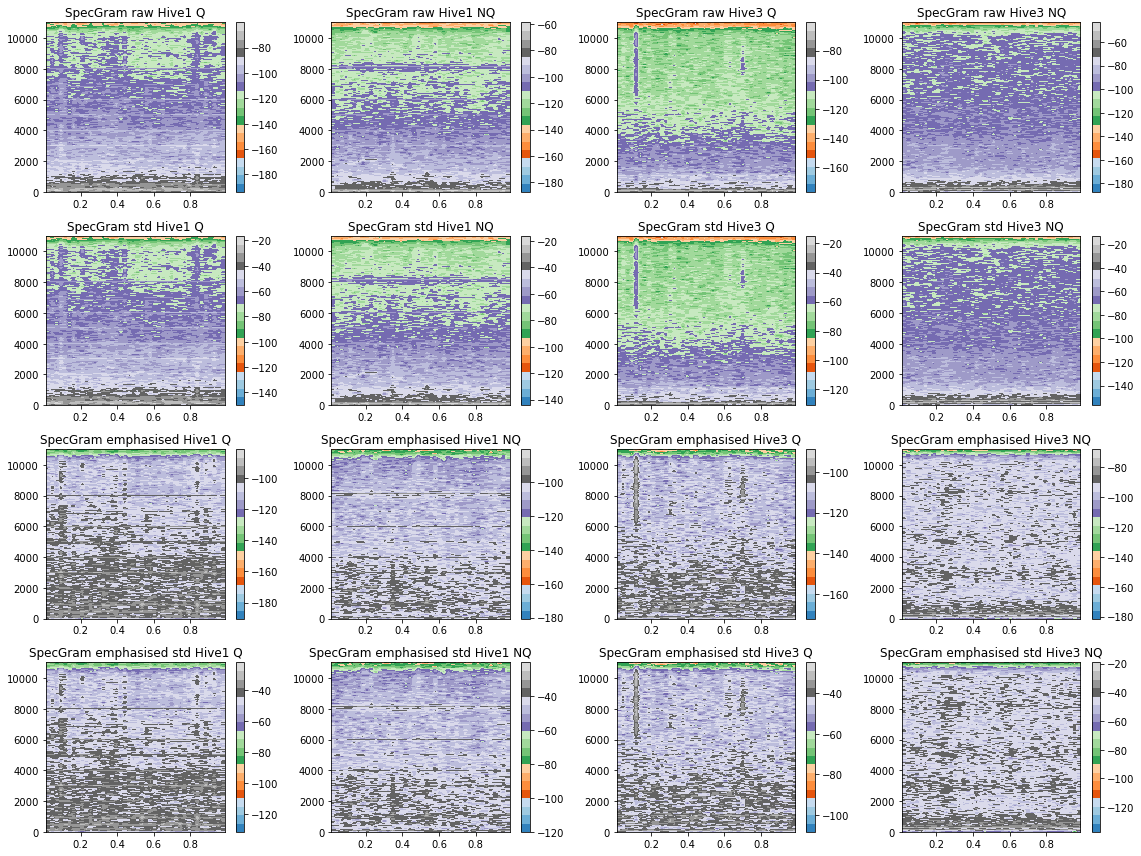

In [13]:
plt.figure(figsize=(16, 12))

for i, signal in enumerate(lsignals):
    for hive in range(2):
        for label in range(2):
            sig = signal[hive][label]
            plt.subplot(len(lsignals), 4, 1 + i*len(lsignals) + 2*hive + label)
            Pxx, freqs, bins, im = plt.specgram(sig, NFFT=1024, Fs = sr, noverlap=512, scale ='dB',cmap = plt.cm.tab20c)
            plt.colorbar()
            plt.title("SpecGram " + ltitles[i] + " " + titles[hive][label])
plt.tight_layout()


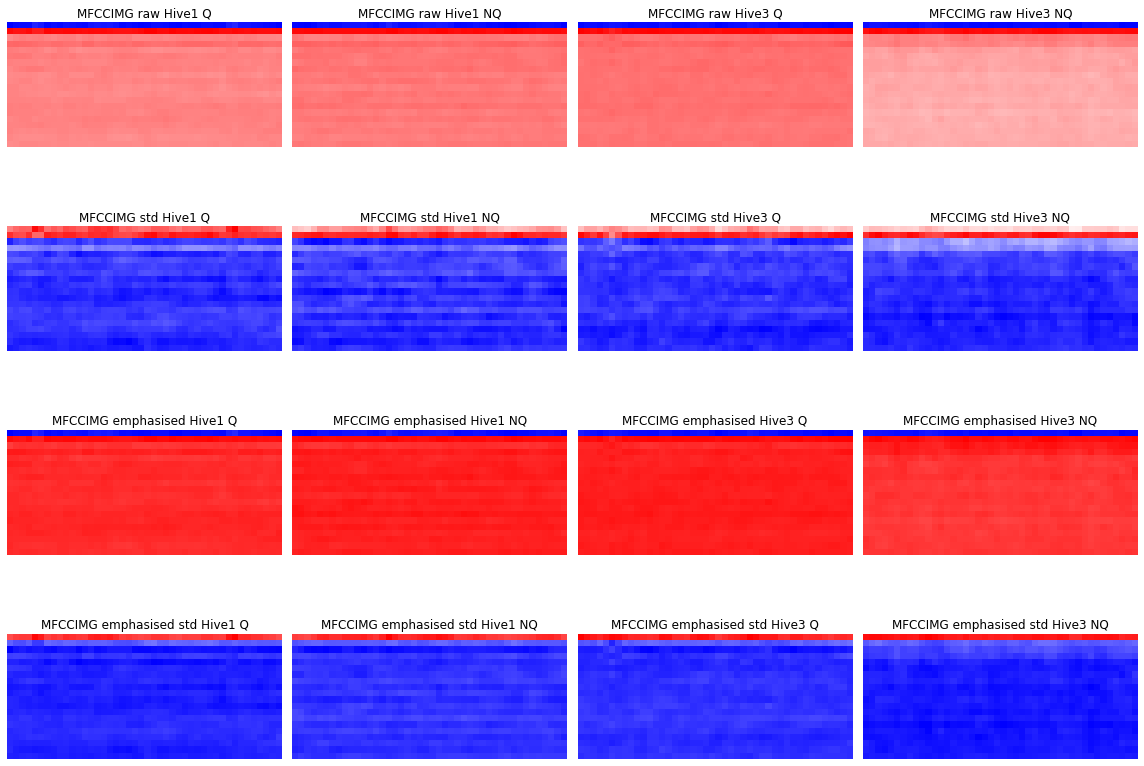

In [14]:
plt.figure(figsize=(16, 12))

for i, signal in enumerate(lsignals):
    for hive in range(2):
        for label in range(2):
            sig = signal[hive][label]
            plt.subplot(len(lsignals), 4, 1 + i*len(lsignals) + 2*hive + label)
            mfccs = MFCC(sig)
            plt.imshow(mfccs, cmap="bwr")
            plt.axis('off')
            plt.title("MFCCIMG " + ltitles[i] + " " + titles[hive][label])
plt.tight_layout()

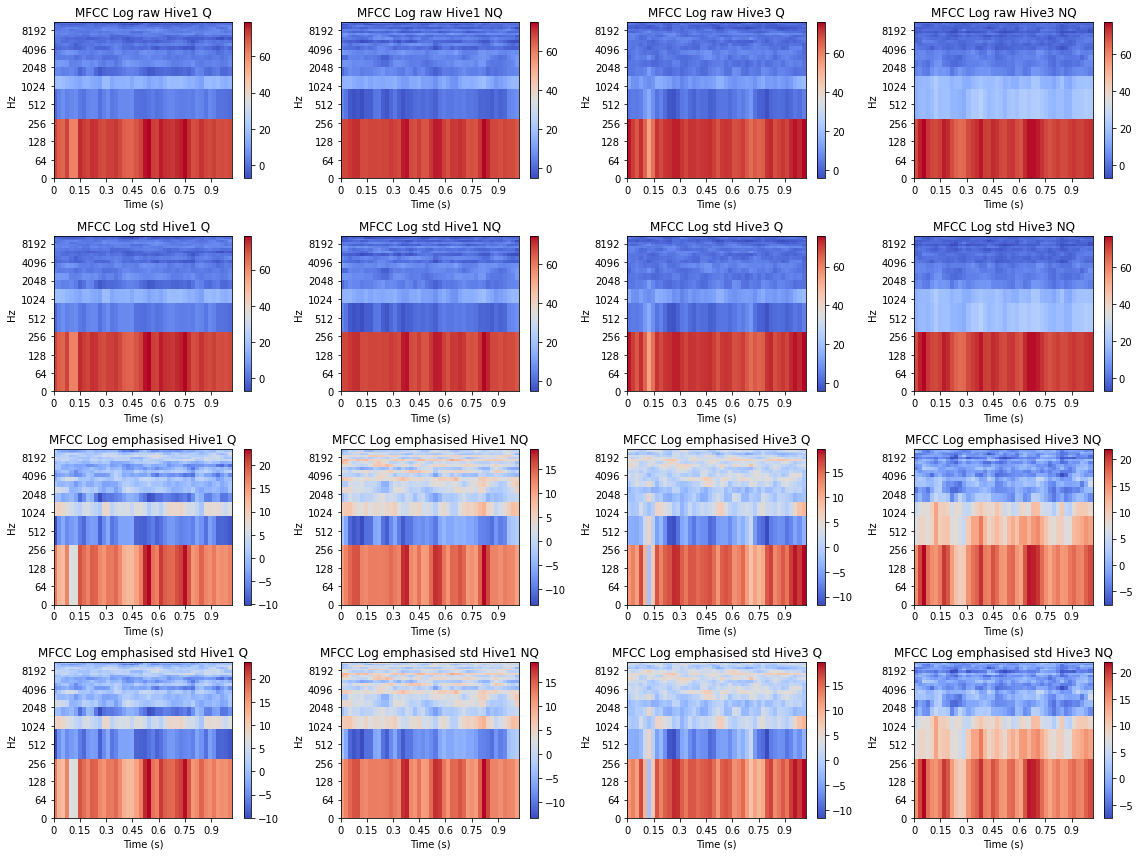

In [15]:
plt.figure(figsize=(16, 12))

for i, signal in enumerate(lsignals):
    for hive in range(2):
        for label in range(2):
            sig = signal[hive][label]
            plt.subplot(len(lsignals), 4, 1 + i*len(lsignals) + 2*hive + label)
            mfccs = MFCC(sig)
            specshow(mfccs[1:,], y_axis='log')
            plt.colorbar()
            plt.title("MFCC Log " + ltitles[i] + " " + titles[hive][label])

plt.tight_layout()


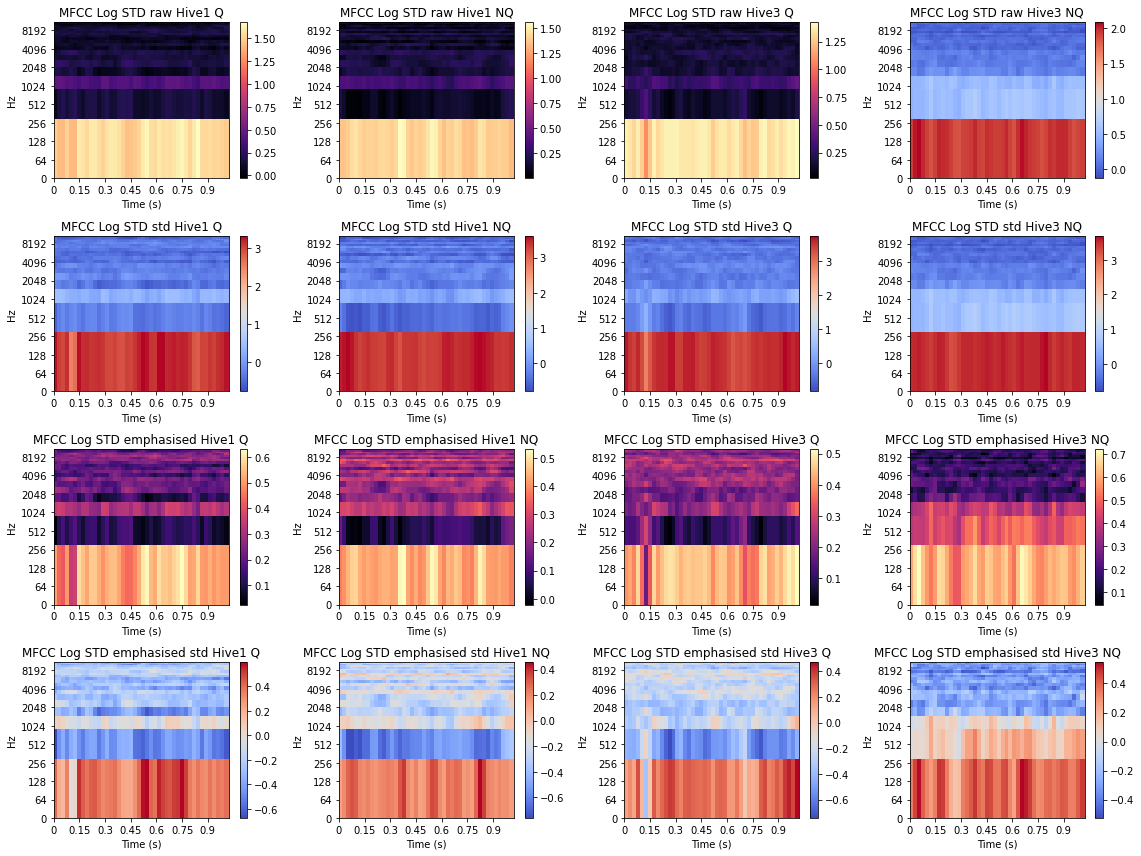

In [16]:
plt.figure(figsize=(16, 12))

for i, signal in enumerate(lsignals):
    for hive in range(2):
        for label in range(2):
            sig = signal[hive][label]
            plt.subplot(len(lsignals), 4, 1 + i*len(lsignals) + 2*hive + label)
            mfccs = preprocessing.scale(MFCC(sig))
            specshow(mfccs[1:,], y_axis='log')
            plt.colorbar()
            plt.title("MFCC Log STD " + ltitles[i] + " " + titles[hive][label])

plt.tight_layout()


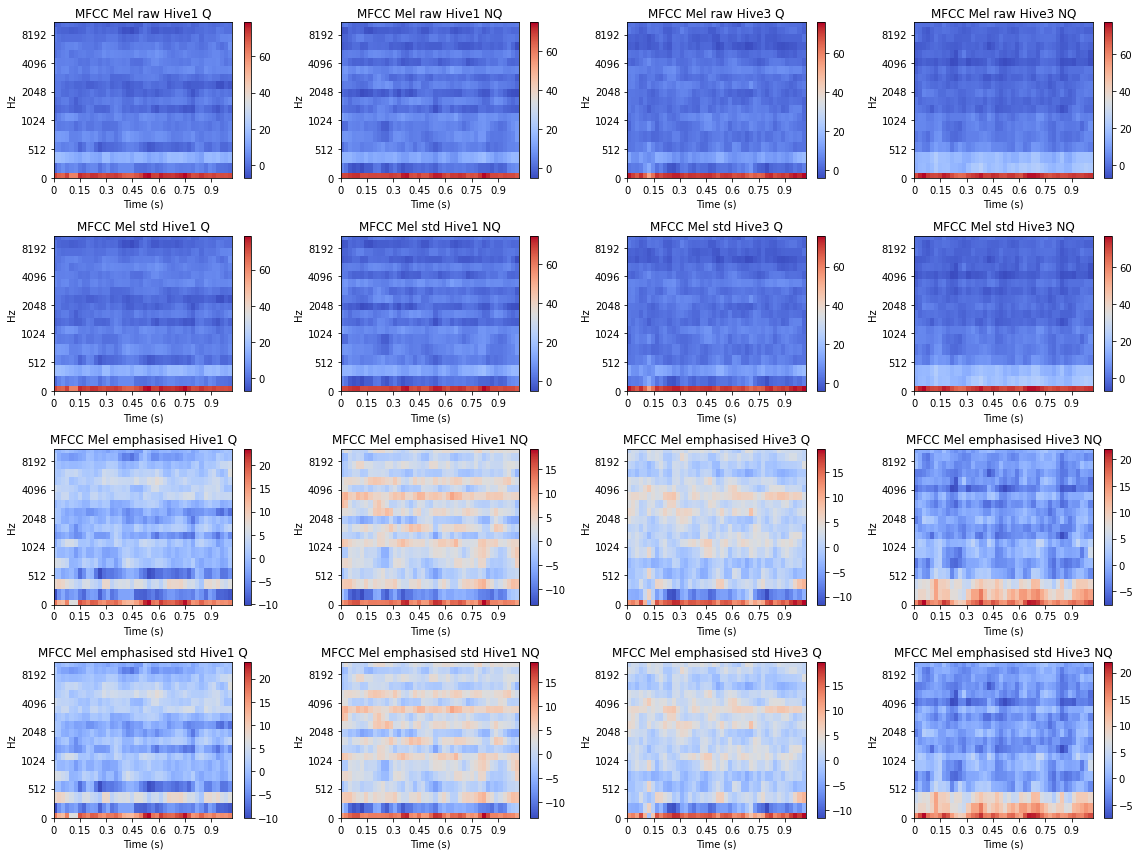

In [17]:
plt.figure(figsize=(16, 12))

for i, signal in enumerate(lsignals):
    for hive in range(2):
        for label in range(2):
            sig = signal[hive][label]
            plt.subplot(len(lsignals), 4, 1 + i*len(lsignals) + 2*hive + label)
            mfccs = MFCC(sig)
            specshow(mfccs[1:,], y_axis='mel')
            plt.colorbar()
            plt.title("MFCC Mel " + ltitles[i] + " " + titles[hive][label])

plt.tight_layout()

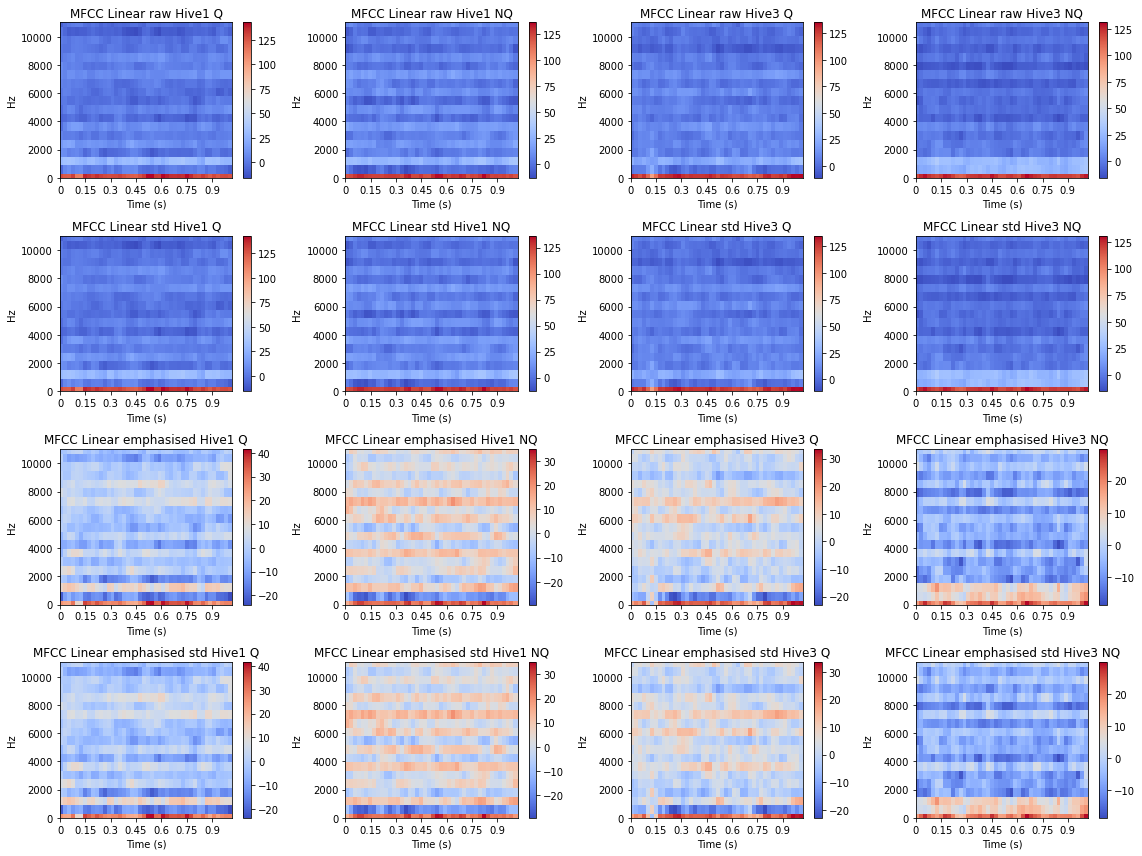

In [18]:
plt.figure(figsize=(16, 12))

for i, signal in enumerate(lsignals):
    for hive in range(2):
        for label in range(2):
            sig = signal[hive][label]
            plt.subplot(len(lsignals), 4, 1 + i*len(lsignals) + 2*hive + label)
            mfccs = librosa.feature.mfcc(sig ,sr=sr, n_mfcc = n_mfcc)
            specshow(mfccs[1:,], y_axis='linear')
            plt.colorbar()
            plt.title("MFCC Linear " + ltitles[i] + " " + titles[hive][label])

plt.tight_layout()

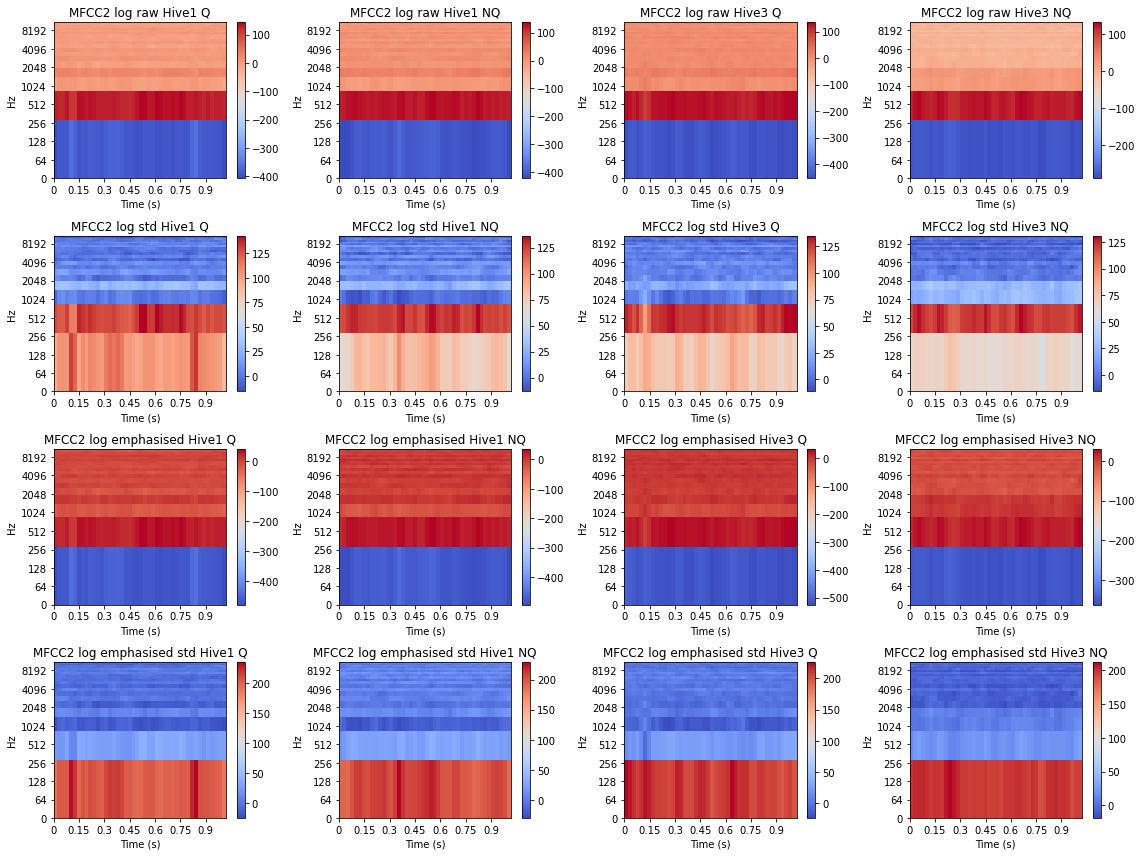

In [19]:
plt.figure(figsize=(16, 12))

for i, signal in enumerate(lsignals):
    for hive in range(2):
        for label in range(2):
            sig = signal[hive][label]
            plt.subplot(len(lsignals), 4, 1 + i*len(lsignals) + 2*hive + label)
            mfccs = MFCC2(sig)
            specshow(mfccs[0:,], y_axis='log')
            plt.colorbar()
            plt.title("MFCC2 log " + ltitles[i] + " " + titles[hive][label])

plt.tight_layout()